In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

In [5]:
df.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

In [6]:
df.dtypes

Country                     object
League                      object
Club                        object
Player Names                object
Matches_Played               int64
Substitution                 int64
Mins                         int64
Goals                        int64
xG                         float64
xG Per Avg Match           float64
Shots                        int64
OnTarget                     int64
Shots Per Avg Match        float64
On Target Per Avg Match    float64
Year                         int64
dtype: object

# Q1: What is the total number of goals scored in the entire dataset?




In [7]:
goals = df['Goals'].sum()

In [8]:
print('Total number of goals scored: {}'.format(goals))

Total number of goals scored: 7795


# Q2: Which player has scored the most goals as a substitution

In [9]:
df[df['Substitution ']>5].sort_values(by='Goals', ascending=False)

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
140,Germany,Bundesliga,(BAY),Robert Lewandowski,24,6,2247,29,26.49,1.12,127,54,5.37,2.28,2017
24,Italy,Serie A,(NAP),Dries Mertens,28,7,2671,28,21.65,0.77,148,102,5.26,3.63,2016
37,Italy,Serie A,(IMI),Gonzalo Higuain,32,6,3138,24,17.84,0.54,134,91,4.06,2.75,2016
453,England,Premier League,(SOU),Danny Ings,32,6,3009,22,16.79,0.53,93,37,2.94,1.17,2019
123,Italy,Serie A,(JUV),Paulo Dybala,26,7,2407,22,11.40,0.45,114,45,4.50,1.78,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,Brazil,Campeonato Brasileiro SÃ©rie A,(SAP),Brenner None,9,6,1063,6,7.50,0.67,36,14,3.22,1.25,2020
635,Brazil,Campeonato Brasileiro SÃ©rie A,(FOR),Wellington Paulista,13,8,1208,6,5.34,0.42,24,12,1.89,0.94,2020
537,Spain,La Liga,(GET),Angel Rodriguez,3,6,501,4,2.06,0.39,14,7,2.65,1.33,2020
490,Netherlands,Eredivisie,(PSV),Noni Madueke,3,7,524,4,2.87,0.52,17,7,3.08,1.27,2019


In [10]:
df['Substitution '].describe()

count    660.000000
mean       3.224242
std        3.839498
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       26.000000
Name: Substitution , dtype: float64

In [43]:
print('Robert Lewandowski has scored the most number of goals as a substitute')
print('The exact number of goals scored by a player as a subsitute could not be calculated from the dataset.')

Robert Lewandowski has scored the most number of goals as a substitute
The exact number of goals scored by a player as a subsitute could not be calculated from the dataset.


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [12]:
top_5_players = df.sort_values(by=['Goals'],ascending=False)[['Player Names', 'Goals']].head()
print('Top 5 Players by number of goals scored:')
print(top_5_players)

Top 5 Players by number of goals scored:
          Player Names  Goals
5    Cristiano Ronaldo     42
12        Lionel Messi     37
391      Ciro Immobile     36
195       Lionel Messi     36
317        Carlos Vela     36


In [13]:
top_5_goals = top_5_players['Goals'].sum()
print('Total goals scored by the top 5 players: {}'.format(top_5_goals))

Total goals scored by the top 5 players: 187


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [14]:
df['Player Names'].value_counts()

Player Names
Andrea Belotti     5
Lionel Messi       5
Luis Suarez        5
Andrej Kramaric    5
Ciro Immobile      5
                  ..
Francois Kamano    1
Lebo Mothiba       1
Gaetan Laborde     1
Falcao             1
Cody Gakpo         1
Name: count, Length: 444, dtype: int64

In [15]:
df['Country'].value_counts()

Country
Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: count, dtype: int64

In [16]:
df_alter = df.drop_duplicates(subset=['Player Names'])
print('Top 10 countries with the most number of players:')
print(df_alter.groupby(by=['Country'])['Player Names'].count().sort_values(ascending=False))

Top 10 countries with the most number of players:
Country
Brazil          76
Germany         62
Spain           59
Italy           51
England         50
France          43
Portugal        36
 Netherlands    34
USA             33
Name: Player Names, dtype: int64


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [17]:
upper = np.percentile(df['Mins'],99,method='midpoint')
lower = np.percentile(df['Mins'],1, method='midpoint')
print(upper, lower)

upper_indices = np.where(df['Mins']>=upper)[0]
lower_indices = np.where(df['Mins']<=lower)[0]

indices_to_drop = np.concatenate((upper_indices, lower_indices))
print(len(indices_to_drop))

3522.0 396.5
14


In [18]:
df_new = df.drop(index=indices_to_drop, axis=0)

In [19]:
print('Row count difference: {}'.format(df.shape[0] - df_new.shape[0]))

Row count difference: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [20]:
top_5_players = df.groupby(by=['Player Names']).sum().sort_values(by=['Goals'],ascending=False)['Goals'].head(5)
print('The top 5 players by number of goals scored throughout all years are: ')
print(top_5_players)

The top 5 players by number of goals scored throughout all years are: 
Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

In [21]:
ronaldo = df[df['Player Names'] == 'Cristiano Ronaldo']
ronaldo

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
5,Spain,La Liga,(JUV),Cristiano Ronaldo,29,0,2634,42,24.68,0.89,162,60,5.84,2.16,2016
112,Spain,La Liga,(JUV),Cristiano Ronaldo,27,0,2375,26,29.00,1.16,178,76,7.12,3.04,2017
203,Italy,Serie A,(JUV),Cristiano Ronaldo,30,1,2857,21,21.65,0.72,177,68,5.89,2.26,2018
385,Italy,Serie A,(JUV),Cristiano Ronaldo,33,0,3127,31,27.32,0.83,208,79,6.32,2.40,2019
553,Italy,Serie A,(JUV),Cristiano Ronaldo,5,1,397,8,5.31,1.27,26,13,6.22,3.11,2020


<Axes: xlabel='Year', ylabel='Goals'>

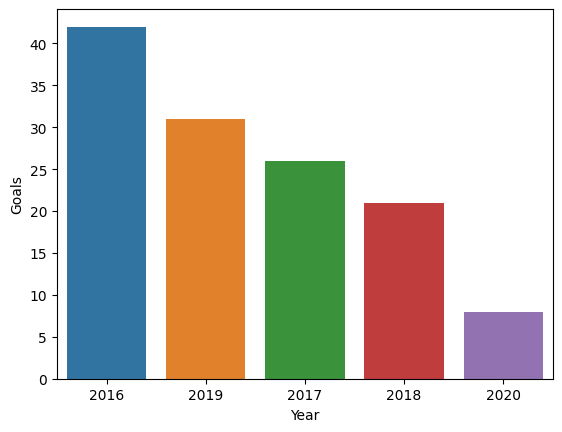

In [22]:
sns.barplot(data=ronaldo, x='Year', y='Goals', order=ronaldo.sort_values(by=['Goals'], ascending=False)['Year'])

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [23]:
ronaldo_2019 = df[(df['Player Names'] == 'Cristiano Ronaldo') & (df['Year'] == 2019)][['Player Names', 'Goals']]
messi_2019 = df[(df['Player Names'] == 'Lionel Messi') & (df['Year'] == 2019)][['Player Names', 'Goals']]
df_ronaldo_messi = pd.concat([ronaldo_2019, messi_2019])
print(df_ronaldo_messi)
print('In 2019, Ronaldo has scored more goals than Messi')

          Player Names  Goals
385  Cristiano Ronaldo     31
333       Lionel Messi     25
In 2019, Ronaldo has scored more goals than Messi


<Axes: xlabel='Player Names', ylabel='Goals'>

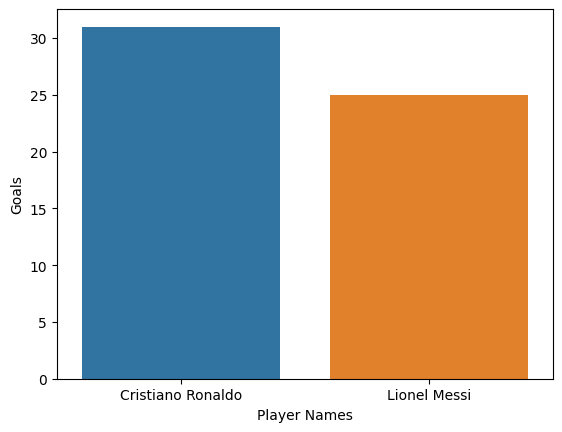

In [24]:
sns.barplot(data=df_ronaldo_messi, x='Player Names', y='Goals')

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

In [25]:
df_country = pd.DataFrame(df['Country'].value_counts()).reset_index()
df_country

,Country,count
0,Spain,100
1,Italy,100
2,Germany,100
3,Brazil,100
4,England,80
5,France,60
6,USA,40
7,Portugal,40
8,Netherlands,40


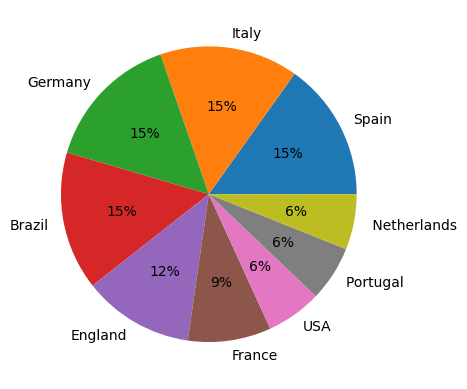

In [26]:
plt.pie(x=df_country['count'], labels=df_country['Country'], autopct='%.0f%%')
plt.show()

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

<Axes: >

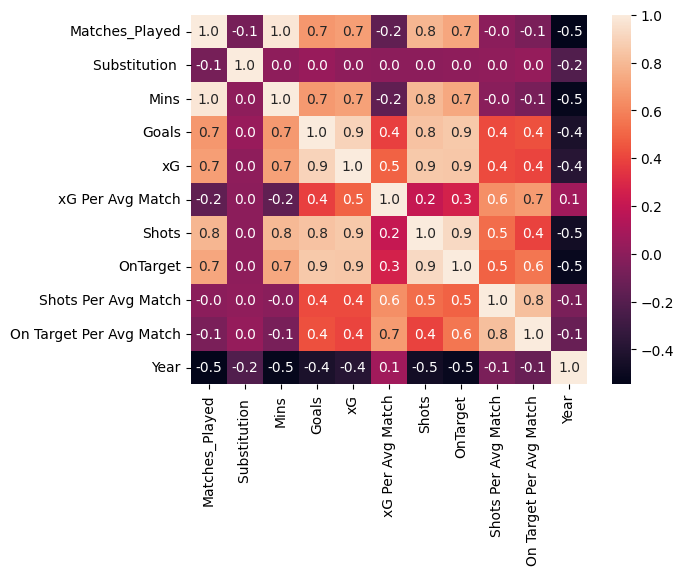

In [27]:
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt='.1f')

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [28]:
df[df['Year']==2020].groupby(by=['Country'])['OnTarget'].median().sort_values(ascending=False)

Country
 Netherlands    25.5
USA             20.0
Brazil          17.0
England         10.5
Italy           10.0
France           9.5
Germany          9.0
Spain            8.0
Name: OnTarget, dtype: float64

In [29]:
print('Netherlands has the maximum median OnTarget Shots for the year 2020')

Netherlands has the maximum median OnTarget Shots for the year 2020


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [30]:
df_30 = df[df['Matches_Played']>30]
df_30['Goals_per_min'] = df_30['Goals']/df_30['Mins']

C:\Users\mohit\AppData\Local\Temp\ipykernel_16276\2777743675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['Goals_per_min'] = df_30['Goals']/df_30['Mins']


In [31]:
df_30.groupby(by='Player Names')['Goals_per_min'].mean().sort_values(ascending=False)

Player Names
Carlos Vela           0.011509
Lionel Messi          0.010478
Zlatan Ibrahimovic    0.010340
Timo Werner           0.010204
Robert Lewandowski    0.009929
                        ...   
Jose Callejon         0.002977
Arthur Caike          0.002833
Dudu                  0.002717
Cicero Semedo         0.002709
Artur                 0.002296
Name: Goals_per_min, Length: 130, dtype: float64

In [32]:
print('Carlos Vela has the highest average goals per minute')

Carlos Vela has the highest average goals per minute


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [33]:
df['Missed Shots'] = df['Shots'] - df['OnTarget']

In [34]:
df.groupby(by=['Player Names'])['Missed Shots'].sum().sort_values()

Player Names
Esteban Burgos          1
Adam Szalai            3
Carlos Soler            3
James Ward-Prowse       3
Eduardo Mancha          3
                     ... 
Fabio Quagliarella    274
Robert Lewandowski    312
Edin Dzeko            332
Lionel Messi          399
Cristiano Ronaldo     455
Name: Missed Shots, Length: 444, dtype: int64

In [35]:
print('Esteban Burgos has the least number of missed shots(1) while Cristiano Ronaldo has the maximum number of missed shots(455)')

Esteban Burgos has the least number of missed shots(1) while Cristiano Ronaldo has the maximum number of missed shots(455)


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [36]:
df_35_matches = df[df['Matches_Played'] > 35]
df_35_freq = pd.DataFrame(df_35_matches.groupby(by='Country')['Player Names'].count())

In [37]:
df_35_freq = df_35_freq.reset_index()

In [38]:
df_35_freq.rename(columns={'Player Names': 'Count of Players'}, inplace=True)

<Axes: xlabel='Country', ylabel='Count of Players'>

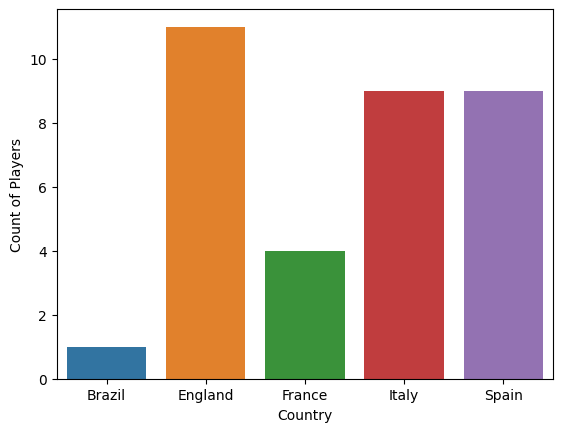

In [39]:
sns.barplot(data=df_35_freq, x='Country', y='Count of Players')

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

In [40]:
df_top_5= pd.DataFrame(top_5_players).reset_index()
df_top_5

,Player Names,Goals
0,Lionel Messi,135
1,Cristiano Ronaldo,128
2,Robert Lewandowski,127
3,Ciro Immobile,107
4,Luis Suarez,95


In [41]:
df_comp = df[df['Player Names'].isin(df_top_5['Player Names'])]
df_comp = df_comp.astype({'Year':str})

<Axes: xlabel='Year', ylabel='Goals'>

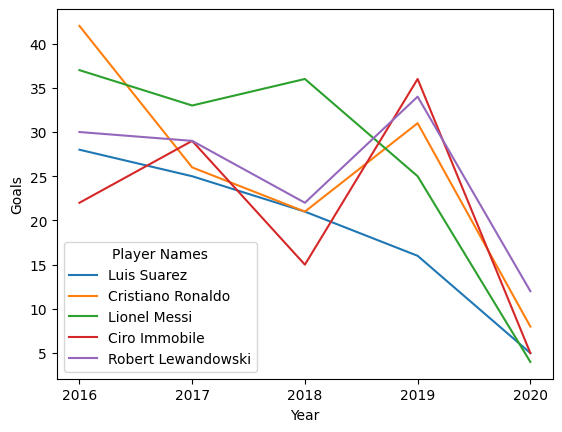

In [42]:
sns.lineplot(data=df_comp, x='Year', y='Goals', hue='Player Names')